In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch

In [51]:
nOfPoints = 500
feraction = 0 #it should be between 0 and 1
codes = [Path.MOVETO] + [Path.LINETO]*2 + [Path.CLOSEPOLY]
vertices = [(3, 3), (7, 3), (7, 7), (0, 0)]
path = Path(vertices, codes)
areaOfCircles = 20

In [52]:
def change_color(xCoordinates, yCoordinates, feraction=0):
    colors = ["red" for x in xCoordinates]
    probability = np.random.rand(len(xCoordinates))
    for p in range(len(xCoordinates)):
        if path.contains_points([(xCoordinates[p], yCoordinates[p])])[0]:
            colors[p] = "blue"
        if probability[p] < feraction:
            if colors[p] == "red":
                colors[p] = "blue"
            else:
                colors[p] = "red"
    return colors

In [56]:
def generate_points(nOfPoints):
    xCoordinates = np.random.rand(nOfPoints) * 10
    yCoordinates = np.random.rand(nOfPoints) * 10
    colors = change_color(xCoordinates, yCoordinates, feraction)
    return xCoordinates, yCoordinates, colors

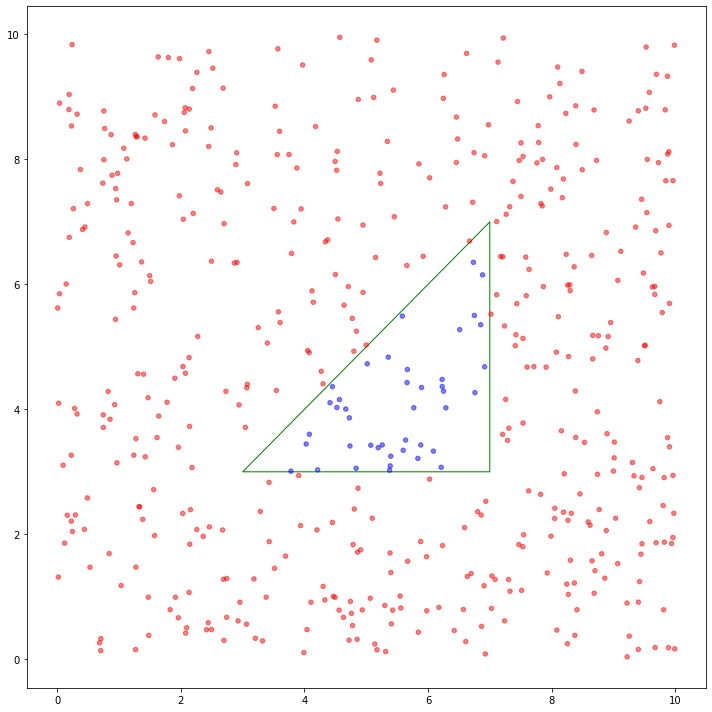

In [57]:
xCoordinates, yCoordinates, colors = generate_points(nOfPoints)
fig, axs = plt.subplots(1, 1,figsize=(10, 10),tight_layout=True)
pathpatch = PathPatch(path, facecolor='none', edgecolor='green')
axs.add_patch(pathpatch)
plt.scatter(xCoordinates, yCoordinates, s=areaOfCircles, c=colors, alpha=0.5)
axs.autoscale_view()
plt.show()